<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Linear%20Regression%20(Car%20Price).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Challenges ML-Supervised

### Goals : Do Data Understanding and Data Preparation for Autombile dataset for Predict Car Price

**Pada Lab Challenges kali ini lakukan proses Business Understanding -> Data Understanding -> Data Preparation pada Automobile_data.csv**


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')

#### Import dataset

In [ ]:
df = pd.read_csv('Automobile_data.csv')

**quick look**

In [ ]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Exploratory Data Analysis (EDA)

### Cleansing Data

**Check for Duplicates Data**

In [ ]:
df.duplicated().any()

False

**Missing Values and Data Type**

In [ ]:
columns = list(df.columns)

for kolom in columns:
    df.loc[df[kolom]=='?', kolom] = np.nan

In [ ]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['Kolom', 'Jumlah']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['Kolom', 'Persen']
    miss = miss1.merge(miss2, how='inner', on='Kolom')
    miss = miss[miss['Jumlah']!=0]
    kolom_miss = list(miss['Kolom'])
    tipe = []
    data = []
    for kolom in kolom_miss:
        tipe.append(df[kolom].dtype)
        data.append(df[kolom][100])
    miss['Tipe'] = tipe
    miss['Contoh'] = data
    return miss

In [ ]:
missing_data(df)

,Kolom,Jumlah,Persen,Tipe,Contoh
1,normalized-losses,41,20.00000,object,106
5,num-of-doors,2,0.97561,object,four
18,bore,4,1.95122,object,3.33
19,stroke,4,1.95122,object,3.47
21,horsepower,2,0.97561,object,97
22,peak-rpm,2,0.97561,object,5200
25,price,4,1.95122,object,9549


In [ ]:
#change data type for missing values
miss_float = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

for kolom in miss_float:
    df[kolom] = df[kolom].astype('float')

In [ ]:
missing_data(df)

,Kolom,Jumlah,Persen,Tipe,Contoh
1,normalized-losses,41,20.00000,float64,106.0
5,num-of-doors,2,0.97561,object,four
18,bore,4,1.95122,float64,3.33
19,stroke,4,1.95122,float64,3.47
21,horsepower,2,0.97561,float64,97.0
22,peak-rpm,2,0.97561,float64,5200.0
25,price,4,1.95122,float64,9549.0


In [ ]:
miss_float

for kolom in miss_float:
    df[kolom] = df[kolom].fillna(df[kolom].median())

In [ ]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [ ]:
missing_data(df)

,Kolom,Jumlah,Persen,Tipe,Contoh


In [ ]:
df.shape

(205, 26)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


**Make Some Visualization**

In [ ]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

**Apakah tipe bahan bakar mempengaruhi harga?**

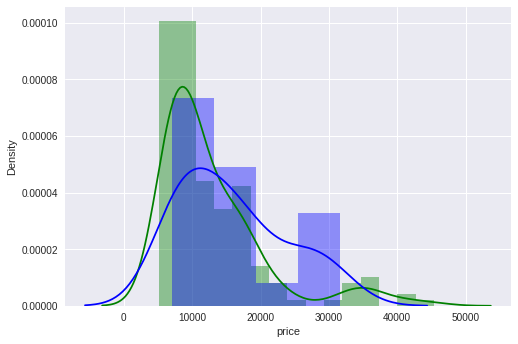

In [ ]:
sns.distplot(df[df['fuel-type']=='gas']['price'], color='green')
sns.distplot(df[df['fuel-type']=='diesel']['price'], color='blue')

# Data Preparation

#### Encode Data

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [ ]:
non_ordinal = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
label_encode = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
find_replace = ['num-of-cylinders']

Label Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for kolom in label_encode:
    df[kolom] = le.fit_transform(df[kolom])

One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=non_ordinal)

Find and Replace

In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
num_replace = {
    'num-of-cylinders' : { 'four':4, 'six':6, 'five': 5, 'three': 3, 'twelve': 12, 'two':2, 'eight': 8}
}

df.replace(num_replace, inplace=True)

In [ ]:
df.head(2)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['wheel-base','engine-size','highway-mpg']].values
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(164, 3)

In [ ]:
X_test.shape

(41, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 1000
)

#### Assignment

1. Lakukan modeling dengan menggunakan algoritma regresi, sehingga didapatkan model yang dapat melakukan prediksi untuk harga mobil bekas (dataset diatas)
2. Perhatikan algoritma dan metrics yang dipakai untuk kasus ini. (Telaah kembali beda regresi dan klasifikasi)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

-4207.127504055377


In [ ]:
print(regressor.coef_)

[ 108.88992916  121.25803621 -286.82309218]


In [ ]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 18098022.10096264


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7692856301867984

In [ ]:
r2_score(y_train, y_pred_train)

0.764746238471391

**Linear Regression Modeling using StatsModel**

In [ ]:
# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# define model
X_train_int = sm.add_constant(X_train)

# fit regression model to data
linear_reg_sm = sm.OLS(y_train, X_train_int).fit()

# check model summary
linear_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     173.4
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           4.69e-50
Time:                        14:01:45   Log-Likelihood:                -1579.3
No. Observations:                 164   AIC:                             3167.
Df Residuals:                     160   BIC:                             3179.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4207.1275   6568.136     -0.641      0.523   -1.72e+04    8764.295
x1           108.8899     57.790      1.884      0.061      -5.239     223.019
x2           121.2580     10.009     12.115      0.000     101.492     141.024
x3          -286.8231     63.364     -4.527      0.000    -411.961    -161.685
==============================================================================
Omnibus:                       22.980   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.762
Skew:                           0.601   Prob(JB):                     9.49e-12
Kurtosis:                       5.446   Cond. No.                     3.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R-squared**: explain how much of the independent variables is explained by changes in our dependent variable. Based on the result, we can say that **our model explain 34.6% of the change in target variable**.

- **coef**: The coefficients of the independent variables in the regression equation, can be used to explain the impact of variable to model prediction (Gonna explain it later)

- **$t$**: t-statistic, can be used as feature importance (Gonna explain it later)

- **$P > |t|$**: It uses the t-statistic to produce the p-value. As example `x4` has p-value 0.002, means that there is a 0.2% chance the `x4` variable has no effect on the dependent variable. Rule of thumb: If p-value < 0.05, then the variable affect dependent variable.

- **Durbin-Watson**: Measurement of homoscedasticity. Ideal value between 1 and 2.

- **Jarque-Bera**: Measurement of normalcy of residual distribution close to 0 indicate normalcy.

- **Omnibus**: Same as **Jarque-Bera**

- **Cond. No.**: Measurement of the sensitivity of our model as compared to the size of chanes in the data. High condition number implied multicolinearity.

In [ ]:
# check model weights
linear_reg_sm.params

const   -4207.127504
x1        108.889929
x2        121.258036
x3       -286.823092
dtype: float64

In [ ]:
# predict
X_test_int = sm.add_constant(X_test)
pred_result = linear_reg_sm.predict(X_test)

ValueError: ignored

In [ ]:
# evaluation using Mean Squared Error
metrics.mean_squared_error(y_test, pred_result)

11155844.832681216

In [ ]:
# evaluation using Mean Absolute Percentage Error
metrics.mean_absolute_percentage_error(y_test, pred_result) * 100

17.929742632825462

**Modeling using Scikit-Learn**

In [ ]:
# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics

In [ ]:
# define linear regression model
linear_reg_scikit = LinearRegression(fit_intercept = True)
# fit model to data
linear_reg_scikit.fit(X_train, y_train)

LinearRegression()

In [ ]:
# check model coefficient
linear_reg_scikit.coef_

array([ 108.88992916,  121.25803621, -286.82309218])

In [ ]:
# create prediction
pred_result = linear_reg_scikit.predict(X_test)

In [ ]:
# evaluation using Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, pred_result))

4254.177018056799

In [ ]:
# evaluation using Mean Absolute Percentage Error
metrics.mean_absolute_percentage_error(y_test, pred_result)

0.26294539744534284

In [ ]:
# check R-squared
linear_reg_scikit.score(X_train, y_train)

0.764746238471391

Model Intepretation

In [ ]:
## create function to estimate r2 for each variables
def r2_est(X,y):
    return metrics.r2_score(y,LinearRegression().fit(X,y).predict(X))

In [ ]:
# check if function already functional (pun intended :p)
r2_est(X_train, y_train)

0.764746238471391

In [ ]:
# save column name to var_name variables
var_name = df.drop(['price'], axis = 1).columns

In [ ]:
var_name

In [ ]:
# feature importance calculation
r2_impact = list()
for j in range(X_train.shape[1]):
  selection = [i for i in range(X_train.shape[1]) if i!=j]
  r2_impact.append(((r2_est(X_train,y_train) - r2_est(X_train[:,selection],y_train)) ,var_name[j]))

In [ ]:
# check variable importance
r2_impact

[(0.0052202113561647945, 'symboling'),
 (0.2158122033699783, 'normalized-losses'),
 (0.030126951409197633, 'fuel-type')]

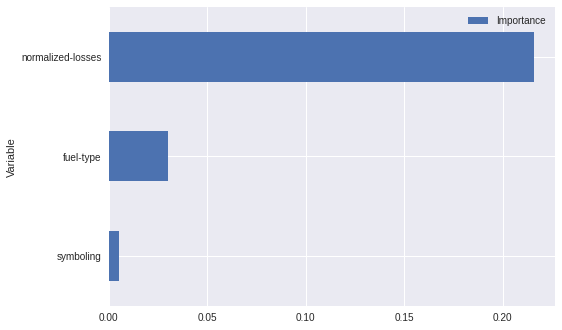

In [ ]:
# visualize feature importance
pd.DataFrame(r2_impact, columns=['Importance', 'Variable']). \
sort_values(by='Importance'). \
plot(x = 'Variable', y = 'Importance', kind = 'barh')

Using Weigh Plot

In [ ]:
# check model weight/param
linear_reg_sm.params

const   -4207.127504
x1        108.889929
x2        121.258036
x3       -286.823092
dtype: float64

In [ ]:
# check weight standard error
linear_reg_sm.bse

const    6568.136345
x1         57.789903
x2         10.008773
x3         63.364326
dtype: float64

In [ ]:
# create feature_weight dataframe
feature_weight = pd.DataFrame(
    {"var_name" : ["egg_price", "Easter", "Post Easter", "Pre Easter", "Intercept"], 
     "coef" : linear_reg_sm.params, 
     "sd_er" : linear_reg_sm.params + linear_reg_sm.bse,
     }
)

# check feature weight
feature_weight

ValueError: ignored

In [ ]:
# visualize weight with its standard error
plt.errorbar(feature_weight['coef'], feature_weight['var_name'], xerr = feature_weight['sd_er'], fmt='o')
plt.axvline(x=0)
plt.show()

### Answer

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

ValueError: ignored

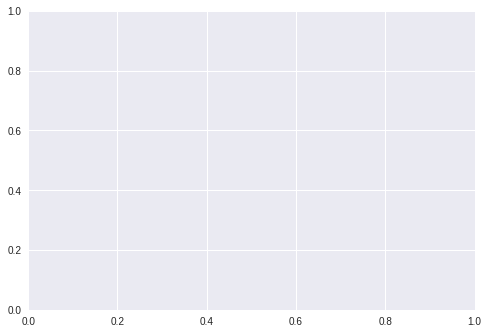

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

ValueError: ignored

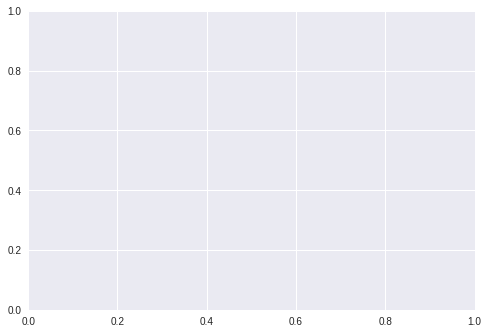

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Used Car Price Prediction')
plt.xlabel('Price')
plt.ylabel('num-of-cylinders')
plt.show()